I built this project for the purpose of practice and learning. I did not create all of this code from scratch. I've used other project examples as guides, books, "Machine Learning with Python Cookbook" by Chris Albon (http://shop.oreilly.com/product/0636920085423.do), "Hands-On Machine Learning with Scikit-Learn and Tensorflow" by Aurelien Geron (http://shop.oreilly.com/product/0636920052289.do), as well as solutions off Stack Overflow. With that said the final decisions and conclusions arrived at are my own.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 2)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', header=None)
df.head(1)

0        1        2        3        4      5        6        7        8   \
0   1  0.49788  0.48246 -0.05921  0.96082  0.126  0.31287 -0.57545 -0.58331   

        9        10       11       12   13   14   15   16   17   18   19   20  \
0 -0.91699 -0.00665 -0.21712 -1.18084  CL5  CL2  CL0  CL2  CL6  CL0  CL5  CL0   

    21   22   23   24   25   26   27   28   29   30   31  
0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL2  CL0  CL0

You can see above, that we need to create column names for our data, we will do so below. One could skip this first process and begin with simply giving the columns an understandable name, but for purposes of the process I will do both steps and begin with naming the columns their origianl names, then from their RE-NAMING them with more straightforward names for better understanding.

Include the _header=_ parameter to allow for renaming the Column names, without this, _pd.read_csv_ will read the dataset's first row (index position = 0) as the column for the dataframe instead of reading it as it should be, row 1 and or index position 0).

# Add Column Labels
Note: The data set and **column label information**, assigned below, can be found [here](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) 

In [3]:
# add column labels (col names)
df.rename(columns={0:'ID', 1:'Age', 2:'Gender', 3:'Education', 4:'Country', 5:'Ethnicity',
                   6:'Nscore', 7:'Escore', 8:'Oscore', 9:'Ascore', 10:'Cscore', 11:'Impulsive',
                   12:'SS', 13:'Alcohol', 14:'Amphet', 15:'Amyl', 16:'Benzos', 17:'Caffeine',
                   18:'Cannibis', 19:'Choc', 20:'Cocaine', 21:'Crack', 22:'Ectasy', 23:'Heroin',
                   24:'Ketamine', 25:'LegalHighs', 26:'LSD', 27:'Meth', 28:'Mushrooms', 29:'Nicotine',
                   30:'Ficticious', 31:'VolSubAbuse'}, inplace=True)

df.head(1)

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082      0.126  0.31287 -0.57545   

    Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos  \
0 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2   

  Caffeine Cannibis Choc Cocaine Crack Ectasy Heroin Ketamine LegalHighs  LSD  \
0      CL6      CL0  CL5     CL0   CL0    CL0    CL0      CL0        CL0  CL0   

  Meth Mushrooms Nicotine Ficticious VolSubAbuse  
0  CL0       CL0      CL2        CL0         CL0

In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannibis', 'Choc', 'Cocaine',
       'Crack', 'Ectasy', 'Heroin', 'Ketamine', 'LegalHighs', 'LSD', 'Meth',
       'Mushrooms', 'Nicotine', 'Ficticious', 'VolSubAbuse'],
      dtype='object')

# Rename Columns

The features below are abbreviated and hard to understand, therefore will be renamed for even more clarity.

In [5]:
df[['Nscore','Escore','Oscore','Ascore','Cscore']].head(1)

Nscore   Escore   Oscore   Ascore   Cscore
0  0.31287 -0.57545 -0.58331 -0.91699 -0.00665

In [6]:
df.rename(columns={'Nscore': 'Neuroticism', 'Escore': 'Extraversion', 'Oscore': 'Openness', 'Ascore': 'Agreeableness', 'Cscore': 'Conscientiousness'}, inplace=True)
df.head(1)

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0   1  0.49788  0.48246   -0.05921  0.96082      0.126      0.31287   

   Extraversion  Openness  Agreeableness  Conscientiousness  Impulsive  \
0      -0.57545  -0.58331       -0.91699           -0.00665   -0.21712   

        SS Alcohol Amphet Amyl Benzos Caffeine Cannibis Choc Cocaine Crack  \
0 -1.18084     CL5    CL2  CL0    CL2      CL6      CL0  CL5     CL0   CL0   

  Ectasy Heroin Ketamine LegalHighs  LSD Meth Mushrooms Nicotine Ficticious  \
0    CL0    CL0      CL0        CL0  CL0  CL0       CL0      CL2        CL0   

  VolSubAbuse  
0         CL0

... we can see from the output above, the dataframe now shows updated column labels.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID                   1885 non-null int64
Age                  1885 non-null float64
Gender               1885 non-null float64
Education            1885 non-null float64
Country              1885 non-null float64
Ethnicity            1885 non-null float64
Neuroticism          1885 non-null float64
Extraversion         1885 non-null float64
Openness             1885 non-null float64
Agreeableness        1885 non-null float64
Conscientiousness    1885 non-null float64
Impulsive            1885 non-null float64
SS                   1885 non-null float64
Alcohol              1885 non-null object
Amphet               1885 non-null object
Amyl                 1885 non-null object
Benzos               1885 non-null object
Caffeine             1885 non-null object
Cannibis             1885 non-null object
Choc                 1885 non-null object
Cocaine              1885 non-null object


We see from the info() function that we have 1885 rows and 32 columns. Info() function is great to get an aggragate look at your dataset and to understand what **type of input values each column holds**.

## Converting Data types: float, int, object
Sometimes you will need to **convert data** to a different type (dtype), using the **astype()** function. For instance, a column that holds numerical data should have a dtype of, integer or float, but was incorrectly recorded as dtype object because it was entered in string-form, i.e., "six" instead of "6". Therefore incorrectly representing numerical data as catagorical, object-type data. If this were the case, one would need to convert the catagorical data in string-form (object), to "float" if numbers are in decimal form, or "int" if they are whole numbers.

Luckily, with this dataset, all values look to be in correct form. From the output above, one can see the dataset holds 19 columns holding data that is object type. This data is recorded correctly representing 7 different classes (CL0-CL6) for each drug type ('Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannibis', 'Choc', 'Cocaine', 'Crack', 'Ectasy', 'Heroin', 'Ketamine', 'LegalHighs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Ficticious'). Below is the meaning of each class (CL):

Catagorical Classes representing usage frequency of each drug

- CL0: Never Used  
- CL1: Used over a Decade Ago  
- CL2: Used in Last Decade  
- CL3: Used in Last Year 
- CL4: Used in Last Month  
- CL5: Used in Last Week 
- CL6: Used in Last Day

## Using catagorical data in machine learning
If we choose to use catagorical data for machine learning, the catagorical data will need to be **encoded**. There are two ways to encode catagorical data represented by a string of text values, into numerical data (integer/float-type). One would do this by way of **"Label Encoding" or "One-Hot-Encoding"**. If the catagorical data held some sort of ordered relation to each other (for example, like the catagorical classes ordered CL0-6 above), one hot encoding would be the best choice. If the catagorical data, had no relation among its different inputs, say for example, we had a column (feature) holding input for each individuals'(sample) state of residence i.e., "NY", or "CA", this catagorical data has no ordered relation of the inputs and therfore one would use label encoding.

### In the case of converting dtype
 
 - (1) Using a for-loop, iterate through object.
 
 - (2) Using "if" statement make selection needed.
 
 - (4) Using astype() function convert data type to correct form.
 
Below code is for example only ...

# (1) Iterate through columns in list from dataframe
for col in list(df.columns):
    
    # (2) Selecting multiple columns that should be float-type/numeric form
    if ('Col name 1' in col or 'Col name 2' in col or 'Col name 4' in col):
        
        # (3) Convert the data to float with astype() function
        df[col] = df[col].astype(float)

# Check for missing values

In [9]:
df.isnull().sum()

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsive            0
SS                   0
Alcohol              0
Amphet               0
Amyl                 0
Benzos               0
Caffeine             0
Cannibis             0
Choc                 0
Cocaine              0
Crack                0
Ectasy               0
Heroin               0
Ketamine             0
LegalHighs           0
LSD                  0
Meth                 0
Mushrooms            0
Nicotine             0
Ficticious           0
VolSubAbuse          0
dtype: int64

**GREAT! No missing values**

### In the case of missing values:
Replace all occurance of missing values with np.nan allowing missing inputs to be recorded as float type which is interpreted as numerical data.

In [10]:
# replace missing values in string/catagorical form, i.e., "I'm missing", or "not available"
df = df.replace({'not available': np.nan})

# EDA

# I will choose Neuroticism score as the target for model
This means I am going to focus model to make **predictions for this feature**, i.e., the dependant variable.

   "Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness ... People with high neuroticism indexes are at risk for the development and onset of common mental disorders, such as mood disorders, anxiety disorders, and **substance use disorder**, symptoms of which had traditionally been called neuroses" - [Wikipedia](https://en.wikipedia.org/wiki/Neuroticism)

In [11]:
df['Neuroticism'].describe()

count    1885.000000
mean        0.000047
std         0.998106
min        -3.464360
25%        -0.678250
50%         0.042570
75%         0.629670
max         3.273930
Name: Neuroticism, dtype: float64

We can see here we've got a **minimum value of -3.46436**, a **maximum value of 3.27393**, with mean ans stdev. of essentially 0, and 1 respectively. When you've got a mean average of 0 and a standard deviation of 1, this represents the values being **Standardized**.

In [12]:
df['Neuroticism'].sort_values().head(10)

1112   -3.46436
1062   -3.15735
1829   -2.75696
1191   -2.75696
1461   -2.75696
1816   -2.75696
756    -2.75696
590    -2.75696
1144   -2.75696
604    -2.52197
Name: Neuroticism, dtype: float64

In [13]:
df['Neuroticism'].sort_values().tail(10)

1746    2.61139
561     2.61139
1302    2.61139
1504    2.82196
154     2.82196
436     2.82196
468     2.82196
331     2.82196
892     3.27393
134     3.27393
Name: Neuroticism, dtype: float64

In [14]:
# seperate and show total for the target values into their unique inputs
df['Neuroticism'].value_counts() #.sort_values()

-0.46725    87
 0.41667    80
-0.34799    78
 0.62967    77
-0.14882    76
 0.04257    73
-0.79151    70
-0.05188    69
-0.24649    68
 0.13606    67
 1.02119    67
 0.31287    66
-0.92104    65
 0.22393    63
-0.58016    61
 0.52135    61
-0.67825    60
-1.05308    57
-1.19430    56
 0.82562    51
 1.23461    49
 0.73545    49
 1.37297    40
 0.91093    37
-1.32828    35
-1.69163    31
-1.43907    29
 1.13281    27
 1.60383    27
-1.55078    26
 1.49158    24
-1.86962    24
 1.83990    20
 1.72012    17
-2.05048    16
 1.98437    15
 2.12700    11
-2.21844    10
 2.28554    10
-2.75696     7
 2.46262     6
 2.82196     5
-2.34360     4
-2.52197     4
 2.61139     3
-2.42317     3
 3.27393     2
-3.46436     1
-3.15735     1
Name: Neuroticism, dtype: int64

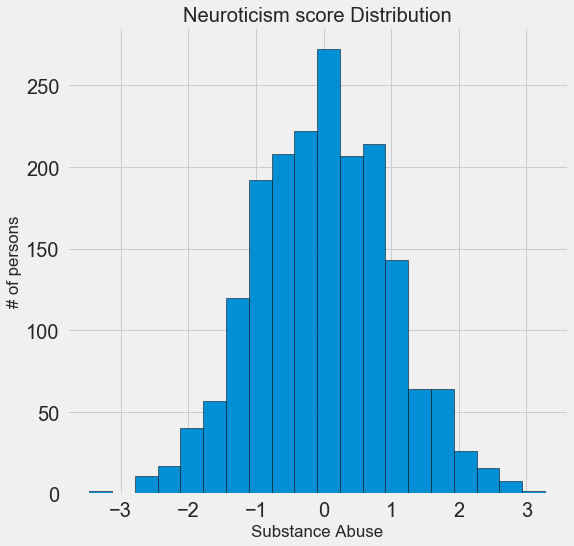

In [15]:
# Getting a visual look at our target distribution

figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['Neuroticism'], bins = 20, edgecolor = 'k');
plt.xlabel('Substance Abuse'); plt.ylabel('# of persons'); 
plt.title('Neuroticism score Distribution');

The Target appears to be normally distributed. In the case of **outliers**, (in this case appear to be minimal showing only a small proportion on left), they throw off the model because they arent a good indicator of actual distribution of a sample.

##### Dealing with outliers (removing):
Want to be careful, not to throw away valuable information. When working with outliers, this also stands and with any data, is always smart to be conservative. A good guide would be to remove only the most extreme outliers. 
In general, **extreme outliers would be below first quartile -3 * Interquartile Range on low end, and on the high end, above Third Quartile + 3 * Interquartile Range.

Lets go ahead and move forward with this and remove only the low, and high end extremes.

(In the case, we can see from the above histogram displaying the distribution of target values, that our target displays a pretty normal distributed, the code below is just one example of how to remove the low and high end outliers from a distribution.

In [16]:
# Calculate first and third quartile
q1 = df['Neuroticism'].describe()['25%']
q3 = df['Neuroticism'].describe()['75%']

# Interquartile range
iqr = q3 - q1

# Remove extreme outliers
df = df[(df['Neuroticism'] > (q1 - 3 * iqr)) & (df['Neuroticism'] < (q3 + 3 * iqr))]

# EDA: finding correlations

**Exploring potential relations of catagorical data w/ the targetusing density plots**

To determine the effect of catagorical data on our target feature that is numeric in value, we can implement the use of a density plot which allows for visually taking a look at multiple catagorical values at once by setting each as a different color. The density curve colored by catagorical value will show how the distribution adjusts based off of class.

In [17]:
# Create a list of classes for catagorical feature to plot
drug_abuse = df.dropna(subset=['Neuroticism'])
drug_abuse = list(drug_abuse['VolSubAbuse'].value_counts().index)

Text(0.5,1,'Density Plot for Neuroticism by Volitile Substance Abuse Class')

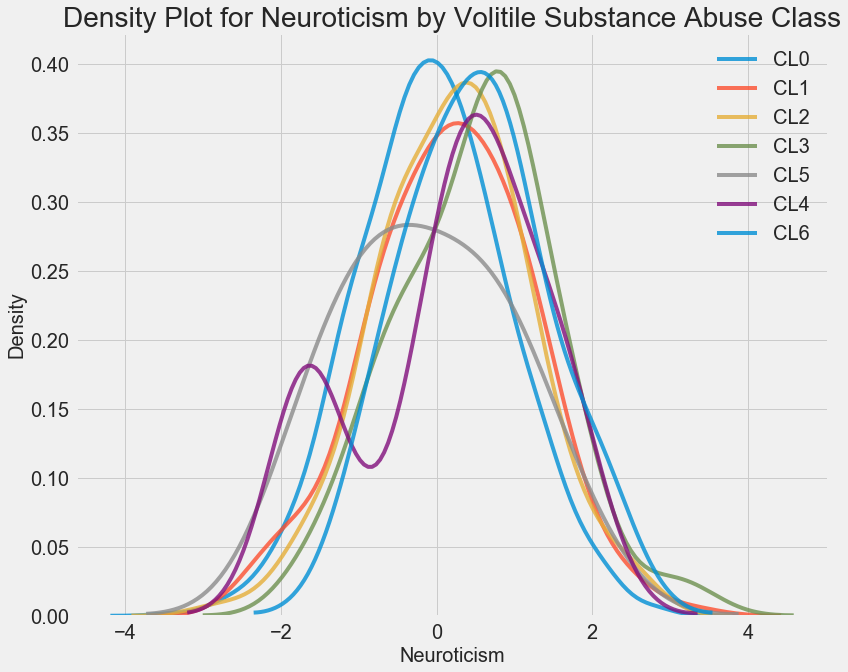

In [18]:
figsize(12, 10)

# Plot each level; levels == Classes 1-6
for abuse_level in drug_abuse:
    # Select the classes
    subset = df[df['VolSubAbuse'] == abuse_level]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['Neuroticism'].dropna(),
               label = abuse_level, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Neuroticism', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot for Neuroticism by Volitile Substance Abuse Class', size = 28)

This information can be useful for determining the target. The column "VolSubAbuseConsum" holds categorical variable classes CL0-6 (remember: encoding needs to be done for catagoric data, in this case one-hot-encoding, before fed into model).

Lets take a look at another catagorical variable "Alcohol" and its classes relation with our target.

In [19]:
alcohol = df.dropna(subset=['Neuroticism'])
alcohol = list(alcohol['Alcohol'].value_counts().index)

Text(0.5,1,'Neuroticism Density given Class of Alchohol Usage')

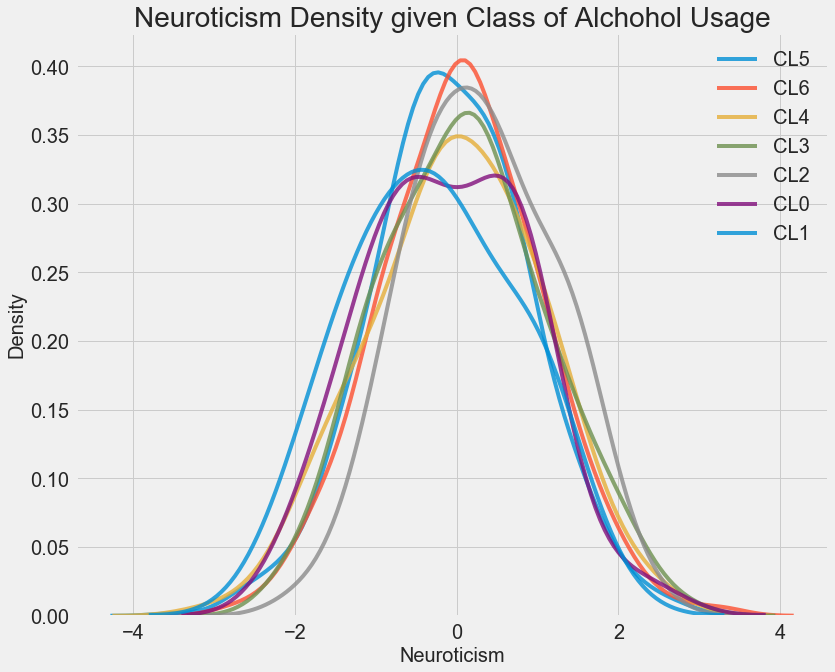

In [20]:
figsize(12, 10)

for alc_usage in alcohol:
    subset = df[df['Alcohol'] == alc_usage]
    
    sns.kdeplot(subset['Neuroticism'].dropna(),
               label = alc_usage, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Neuroticism', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Neuroticism Density given Class of Alchohol Usage', size = 28)

Neither seem to make as significant a difference in the distribution of the our neuroticism value. It still might make sense to include these catagorical variables

# EDA: Determining the correlation among target and features
we will use the **Pearson Correlation Coefficient (r)** which measures linear relation between variables. -1 means two variables have the greatest negative correlation and +1 represents the highest possible positive correlation.

There can be non-linear relationships between Features and Targets also, but the Correlation Coefficient (R) doesnt account for them. Determing the relation of the target and features first on a linear basis to begin with makes sense. From this initial step, I can begin to make more clear which features will be most important to use for predicting the target moving forward.

## correlation coefficient (r)

In [21]:
# calculate the correlation coefficient between all features and our target ("Neuroticism")
tar_feat_corr = df.corr()['Neuroticism'].sort_values()

# most positive corr
print(tar_feat_corr.tail(15))

Extraversion        -0.431051
Conscientiousness   -0.391088
Agreeableness       -0.216964
Age                 -0.136654
Country             -0.136191
Education           -0.100993
Openness             0.010177
ID                   0.018639
Ethnicity            0.047642
Gender               0.074646
SS                   0.079988
Impulsive            0.174399
Neuroticism          1.000000
Name: Neuroticism, dtype: float64


In [22]:
# most negative corr
print(tar_feat_corr.head(15))

Extraversion        -0.431051
Conscientiousness   -0.391088
Agreeableness       -0.216964
Age                 -0.136654
Country             -0.136191
Education           -0.100993
Openness             0.010177
ID                   0.018639
Ethnicity            0.047642
Gender               0.074646
SS                   0.079988
Impulsive            0.174399
Neuroticism          1.000000
Name: Neuroticism, dtype: float64


# EDA: Accounting for non-linear relationships target & features

- take square root and log transformations of the numerical variables

- one-hot encode categorical variables

- calculate the correlation coefficient for all features with our target, Neuroticism.

In [23]:
# Select the numeric columns
numeric_cols = df.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_cols.columns:
    # Skip over our target
    if col == 'Neuroticism':
        next
    else:
        numeric_cols['sqrt_' + col] = np.sqrt(numeric_cols[col])
        numeric_cols['log_' + col] = np.log(numeric_cols[col])

# Select the categorical columns
categorical_cols = df[['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caffeine', 
                       'Cannibis', 'Choc', 'Cocaine','Crack', 'Ectasy', 
                       'Heroin', 'Ketamine', 'LegalHighs', 'LSD', 'Meth',
                       'Mushrooms', 'Nicotine', 'Ficticious', 'VolSubAbuse']]

# One hot encode
categorical_cols = pd.get_dummies(categorical_cols)

# Join the two dataframes using concat
features = pd.concat([numeric_cols, categorical_cols], axis = 1)

# Drop persons w/o Neuroticism value
features = features.dropna(subset= ['Neuroticism'])

# compute correlation among features and target
correlations = features.corr()['Neuroticism'].dropna().sort_values()

C:\Users\Emtma_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Emtma_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [24]:
# 10 ten positive correlations
correlations.tail(10)

Nicotine_CL6      0.103657
Benzos_CL5        0.112462
Meth_CL6          0.113172
sqrt_Ethnicity    0.116081
log_Ethnicity     0.123222
log_Impulsive     0.143327
sqrt_Impulsive    0.152002
Benzos_CL6        0.173490
Impulsive         0.174399
Neuroticism       1.000000
Name: Neuroticism, dtype: float64

Interesting to see here, after transforming our features, we have quite a bit more positive correlations than before we did our transformations, the fact that the transformations allowed us to discover better correlations positive, negative, big or small means the effort was successful.

In [25]:
# 10 ten negative correlations
correlations.head(10)

Extraversion             -0.431051
Conscientiousness        -0.391088
sqrt_Extraversion        -0.231871
Benzos_CL0               -0.227671
Agreeableness            -0.216964
Meth_CL0                 -0.178385
log_Extraversion         -0.177977
sqrt_Conscientiousness   -0.177629
log_Conscientiousness    -0.173284
Heroin_CL0               -0.164255
Name: Neuroticism, dtype: float64

These new-found correlations will be important when it comes time to choose the features we want (**feature selection**) for the machine learning model. Next I'll take a look at the most siginificant correlation discovered.

# EDA: Visualizing relationships and correlations 
To visualize the relation between two (or more) features, I will use a **scatterplot**. Can also include additional features into the plot with different symbols which can be altered by color, shape and size.

Below I will demonstrate the relationship of age and Neuroticism (target) as well as colored based off of a third feature, impulsiveness.
    
    Note: Age is represented by the below values: 
        -0.95197: 18-24  
        -0.07854: 25-34  
         0.49788: 35-44  
         1.09449: 45-54  
         1.82213: 55-64 
         2.59171: 65+

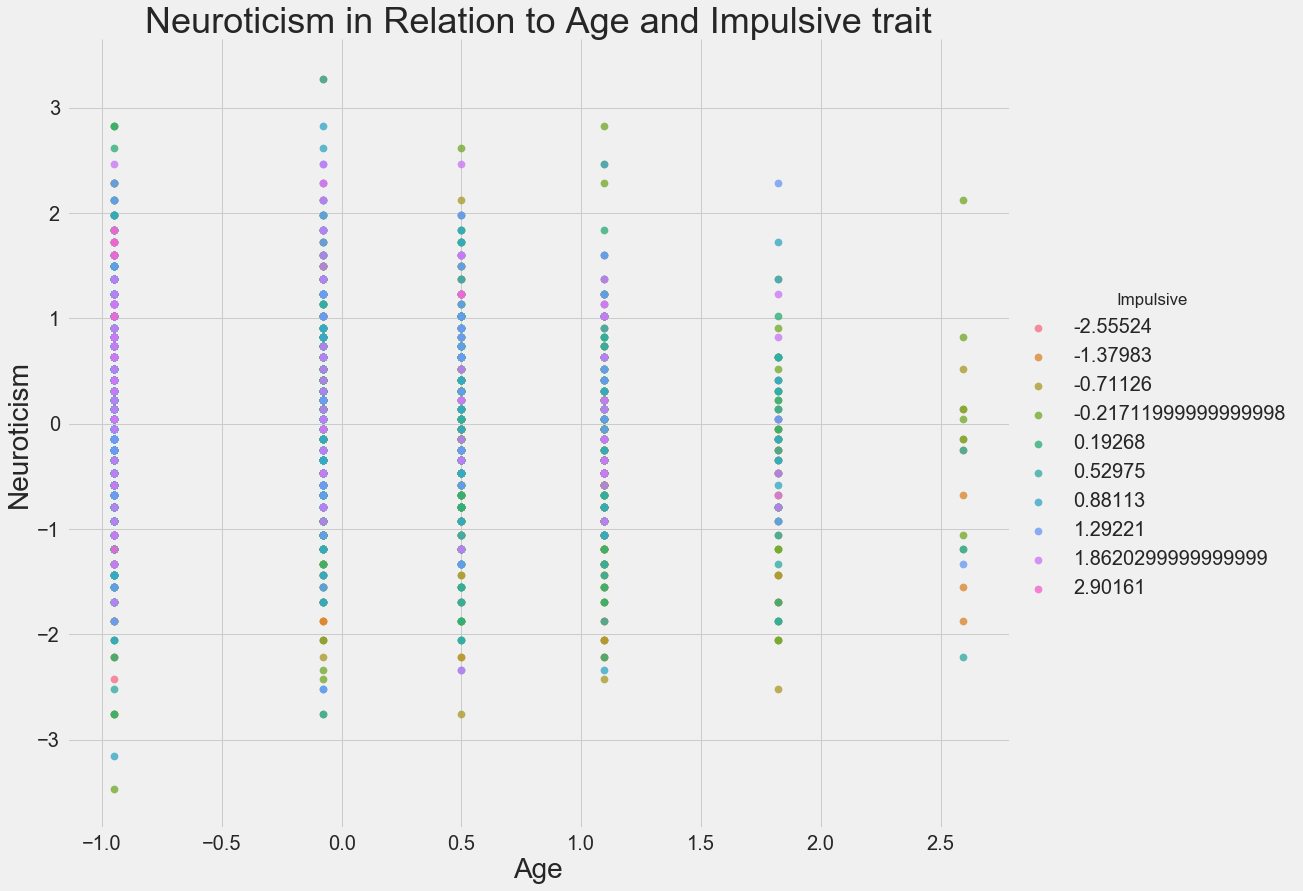

In [26]:
figsize(12, 10)

# Extract a Catagorical feature (VolSubAbuse) we want to include ..
# alongside our primary comparison (Neuroticism relation to age) chart.
features['Impulsive'] = df.dropna(subset = ['Neuroticism'])['Impulsive']

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Age', 'Neuroticism', hue='Impulsive', data = features, scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
           size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Age", size = 28)
plt.ylabel('Neuroticism', size = 28)
plt.title('Neuroticism in Relation to Age and Impulsive trait', size = 36);

# EDA: Visualizing many features w/ pairs plot

A Pairs plot works between several different variables and therefore is awesome for looking at multiple different features/variables simoultaneously.

- Upper triangle has scatterplots
- The diagonal will be histograms
- The lower triangle holds correlation coefficient (between 2 features)

C:\Users\Emtma_000\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Emtma_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Emtma_000\Anaconda3\lib\site-packages\matplotlib\contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Emtma_000\Anaconda3\lib\site-p

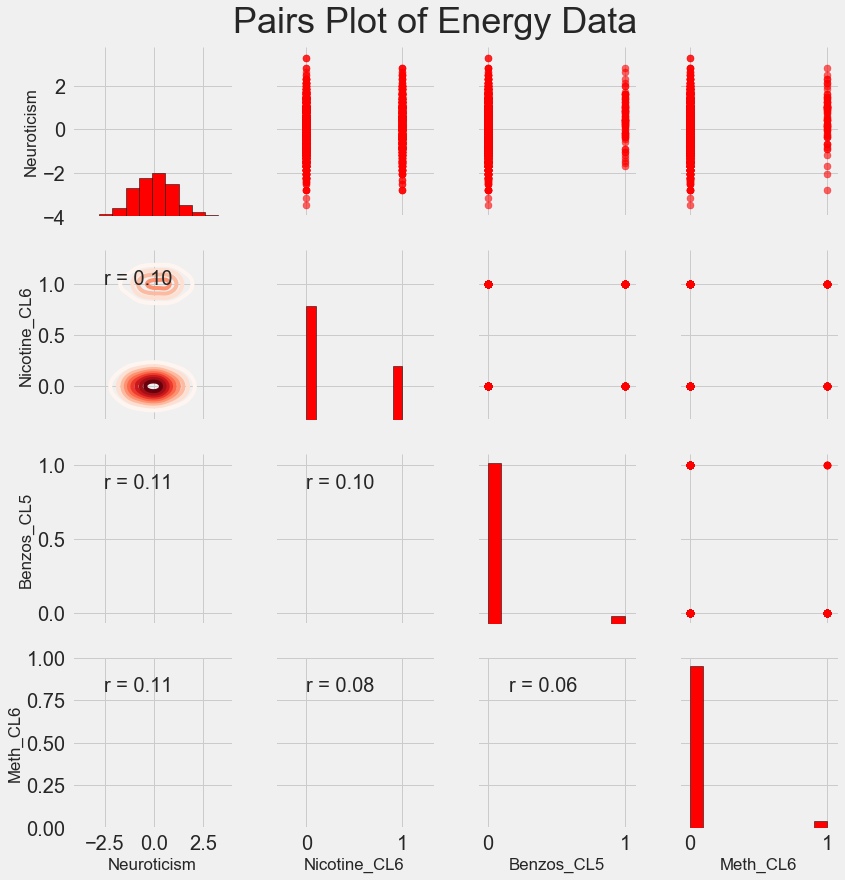

In [27]:
# Select columns for the plot
plot_data = features[['Neuroticism', 'Nicotine_CL6', 'Benzos_CL5','Meth_CL6']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
plot_data = plot_data.dropna()

# calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.2, .8), xycoords=ax.transAxes, size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

### Pairs Plot Interpretation
To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between **FEATURE1** and **FEATURE2**, we look at FEATURE1 column and find FEATURE2 row. At the intersection, we see the plotted relationship.

# Feature Engineering

Once we are through with the EDA process, even though EDA is an iterative process where is always available to return to it and improve on, delve deeper into additional channels if needed or are just curious to look for additional insights from the data, from here, the next step is to move forward with the uncovered relationships discovered in the data, correlations and the insights gathered from these and use this information to engineer features for the machine learning process.

Feature engineering and feature selection are as well iterative processes meaning it will take several attempts and adjustments to get them how we want it. For a good read on **Feature Engineering** [Click here](https://blog.featurelabs.com/secret-to-data-science-success/)

## Feature Engineering Process

- Select the numerical variables and categorical variables
- Add in the log transformation of the numerical variables
- One-hot encode the categorical variables

In [28]:
# Copy the original data
features = df.copy()

# Select the numeric columns
numeric_subset = df.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip over our Target feature 
    if col == 'Neuroticism':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = df[['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannibis', 'Choc', 'Cocaine', 'Crack', 'Ectasy',
                         'Heroin', 'Ketamine', 'LegalHighs', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Ficticious', 'VolSubAbuse']]

# One hot encode catagorical columns
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

print(features.shape)

(1885, 156)


C:\Users\Emtma_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


We have 1885 observations (people) with 156 different features (one column is Neuroticism). Not every feature will be important for predicting our target, also some of them (features) will be highly collinear where we would want to exclude them.

# Feature Selection
In my own words, feature selection is the process of excluding non-useful features, like the collinear features previously mentioned, to minimize model complexity which simoultaneously improving interpretability. This will make for a more optimal and efficient model as a whole. The book, "Feature Engineering for Machine Learning - principles and techniques for data scientists", by Alice Zheng & Amanda Casari, the book states, "Feature selection is not about reducing training time - in fact, some techniques increase overall training time - but about reducing model scoring time.".

### Three types of feature selection:
**(1) Filter method**: These select the best features by examining their statistical properties. **(2) Wrapper method**: This is a method of trial and error to find the subset of features that produce highest quality predictions. **(3) Embedded method:** This method selects the best feature subset as part fo an extension of a ml algorithm's training process.

### Removing collinear features
Features of a dataset are typically to some extent correlated a little bit, but highly correlated features referred to as collinear features just create noise for our machine learning model. With these highly correlated features we really do not need both and can remove one of the two that are collinear of each other while maintaining all of the useful and needed information. Removing these highly correlated features from our dataset creates efficiency, reducing un-needed additional information that only creates model complexity. **Benefits to removing collinear features**:

- reduces model complexity and improves model generalization
- Improves ability to interpret model

Below we will determine the collinear features and then remove these based off a given thresh-hold.

In [29]:
# Call our feature data into a DataFrame
feature_df = pd.DataFrame(features)
# Take a look at formatted (dataframe format) data
feature_df.head(1)

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0   1  0.49788  0.48246   -0.05921  0.96082      0.126      0.31287   

   Extraversion  Openness  Agreeableness  Conscientiousness  Impulsive  \
0      -0.57545  -0.58331       -0.91699           -0.00665   -0.21712   

        SS  log_ID   log_Age  log_Gender  log_Education  log_Country  \
0 -1.18084     0.0 -0.697396   -0.728857            NaN    -0.039968   

   log_Ethnicity  log_Extraversion  log_Openness  log_Agreeableness  \
0      -2.071473               NaN           NaN                NaN   

   log_Conscientiousness  log_Impulsive  log_SS  Alcohol_CL0  Alcohol_CL1  \
0                    NaN            NaN     NaN            0            0   

   Alcohol_CL2  Alcohol_CL3  Alcohol_CL4       ...         Meth_CL3  Meth_CL4  \
0            0            0            0       ...                0         0   

   Meth_CL5  Meth_CL6  Mushrooms_CL0  Mushrooms_CL1  Mushrooms_CL2  \
0         0         0              1              0              0   

   Mushrooms_CL3  Mushrooms_CL4  Mushrooms_CL5  Mushrooms_CL6  Nicotine_CL0  \
0              0              0              0              0             0   

   Nicotine_CL1  Nicotine_CL2  Nicotine_CL3  Nicotine_CL4  Nicotine_CL5  \
0             0             1             0             0             0   

   Nicotine_CL6  Ficticious_CL0  Ficticious_CL1  Ficticious_CL2  \
0             0               1               0               0   

   Ficticious_CL3  Ficticious_CL4  VolSubAbuse_CL0  VolSubAbuse_CL1  \
0               0               0                1                0   

   VolSubAbuse_CL2  VolSubAbuse_CL3  VolSubAbuse_CL4  VolSubAbuse_CL5  \
0                0                0                0                0   

   VolSubAbuse_CL6  
0                0  

[1 rows x 156 columns]

In [30]:
# Find the highly correlated (collinear) features
corr_matrix = feature_df.corr()
corr_matrix.head()

ID       Age    Gender  Education   Country  Ethnicity  \
ID         1.000000 -0.271395 -0.025467  -0.025253 -0.340751   0.059309   
Age       -0.271395  1.000000  0.110286   0.158811  0.354241  -0.069753   
Gender    -0.025467  0.110286  1.000000   0.196774  0.216271  -0.001213   
Education -0.025253  0.158811  0.196774   1.000000  0.225311  -0.036099   
Country   -0.340751  0.354241  0.216271   0.225311  1.000000  -0.127946   

           Neuroticism  Extraversion  Openness  Agreeableness  \
ID            0.018639     -0.046960  0.173565      -0.028782   
Age          -0.136654     -0.033849 -0.226778       0.063504   
Gender        0.074646      0.057864 -0.131021       0.219743   
Education    -0.100993      0.115645  0.057994       0.091088   
Country      -0.136191      0.109524 -0.341969       0.150921   

           Conscientiousness  Impulsive        SS    log_ID   log_Age  \
ID                 -0.072094   0.119663  0.165882  0.870690 -0.056803   
Age                 0.183564  -0.190939 -0.332188 -0.340454  0.970572   
Gender              0.183831  -0.167492 -0.244277 -0.026663 -0.066630   
Education           0.240417  -0.132482 -0.131146 -0.025068 -0.054136   
Country             0.214000  -0.231572 -0.345415 -0.339129  0.020159   

             log_Gender  log_Education  log_Country  log_Ethnicity  \
ID         1.396345e-14      -0.011200    -0.042560      -0.005833   
Age        7.355964e-16       0.130528     0.069206      -0.093613   
Gender    -1.000000e+00       0.024853     0.076444       0.073555   
Education  1.153298e-15       0.980288     0.154686      -0.048094   
Country   -1.302282e-14       0.098229     0.999626      -0.103284   

           log_Extraversion  log_Openness  log_Agreeableness  \
ID                 0.040169      0.160722           0.038114   
Age               -0.094589     -0.180797           0.021684   
Gender            -0.033274     -0.031976           0.110454   
Education          0.022390     -0.048740           0.040548   
Country           -0.031710     -0.192121           0.022729   

           log_Conscientiousness  log_Impulsive    log_SS  Alcohol_CL0  \
ID                      0.005727       0.107696  0.166331     0.002603   
Age                    -0.009973      -0.082503 -0.210636    -0.011043   
Gender                  0.069796      -0.068755 -0.055194    -0.015873   
Education               0.120794      -0.119594 -0.107912     0.015661   
Country                 0.071598      -0.146926 -0.213866     0.018451   

           Alcohol_CL1  Alcohol_CL2  Alcohol_CL3  Alcohol_CL4  \
ID           -0.048023    -0.026392     0.034018     0.056205   
Age           0.150443     0.070213    -0.024978    -0.078519   
Gender        0.000072    -0.011277    -0.020581     0.025327   
Education    -0.030474    -0.050312    -0.121515    -0.062689   
Country       0.038371    -0.027030    -0.106174    -0.089971   

                ...         Meth_CL3  Meth_CL4  Meth_CL5  Meth_CL6  \
ID              ...         0.101727  0.074410  0.083018  0.068112   
Age             ...        -0.169692 -0.095451 -0.081170 -0.045894   
Gender          ...        -0.135514 -0.039529 -0.047061 -0.090628   
Education       ...        -0.111491 -0.051912 -0.037374 -0.089912   
Country         ...        -0.244857 -0.188416 -0.143954 -0.159122   

           Mushrooms_CL0  Mushrooms_CL1  Mushrooms_CL2  Mushrooms_CL3  \
ID             -0.127711      -0.121371       0.052154       0.134979   
Age             0.160399       0.300661      -0.042556      -0.285277   
Gender          0.249047      -0.004882      -0.058249      -0.175616   
Education       0.120151       0.044953       0.003392      -0.125671   
Country         0.411946       0.058713      -0.108555      -0.303912   

           Mushrooms_CL4  Mushrooms_CL5  Mushrooms_CL6  Nicotine_CL0  \
ID              0.105740       0.072059       0.012667     -0.064063   
Age            -0.192771      -0.095744       0.017026      0.128249   
Gender         -0.

In [31]:
# Select upper section of matrix (where the high correlations lie)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [32]:
# find columns with correlation > 60%
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]
print(to_drop)

['SS', 'log_ID', 'log_Age', 'log_Education', 'log_Country', 'log_Ethnicity', 'log_Extraversion', 'log_Openness', 'log_Agreeableness', 'log_Conscientiousness', 'log_Impulsive', 'log_SS', 'Cocaine_CL0', 'Ectasy_CL0', 'Mushrooms_CL0', 'Mushrooms_CL1']


In [33]:
features = feature_df.drop(to_drop, axis=1)
features.shape

(1885, 140)

Earlier during the feature engineering cell where we added in the log transformation of the numerical variables and One-hot encoded the categorical variables, our dataset was 1885 rows an 156 columns. **After Removing our collinear features** it knocked our dataset down from **156 columns/features to 140** shown above, i.e., (rows, columns)

In [34]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(1885, 140)

### Including abs() function into our collinear removal process

In [35]:
# Find the highly correlated (collinear) features
cor_matrix = feature_df.corr().abs()

upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

feat = feature_df.drop(to_drop, axis=1)
feat.shape

(1885, 134)

Including abs() function for collinear feature removal, resulted in an additional removal of 6 more features.

Models using linear regression can be an issue with a large number of features. There many processes for feature selection such as **principal component analysis (PCA) and independant component analysis (ICA) for highly dimensional data** and if necessary these higher level processes could be implemented. Before considering such processes, Lets first see how the model performs without them. Remember, we can always come back to these processes if necessary. Feature engineering and selection is as well an iterative process.

# Split data into a Train and Test set

Below is the Wikipedia explanation of Training and Test sets:

**Training Set**: Is a set of examples used to fit the parameters (e.g. weights of connections between neurons in artificial neural networks) of the model.[4] The model (e.g. a neural net or a naive Bayes classifier) is trained on the training dataset using a supervised learning method (e.g. gradient descent or stochastic gradient descent). In practice, the training dataset often consist of pairs of an input vector (or scalar) and the corresponding output vector (or scalar), which is commonly denoted as the target (or label). The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

**Test Set**: Test dataset is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset.[5] When the data in the test dataset has never been used in training (for example in cross-validation), the test dataset is also called a holdout dataset.

I will split our data into a **test set of 30%** and a **training set of 70%** of the data we have from our dataset.

In [36]:
# Extract the individuals without a "Neuroticism" value from those with one
no_neuro = features[features['Neuroticism'].isna()]
neuro = features[features['Neuroticism'].notnull()]

print(no_neuro.shape)
print(neuro.shape)

(0, 140)
(1885, 140)


As we see from the output above, we have no individuals in our data, that do not have a Neuroticism value.

In [37]:
# Separate out the features from targets
features = neuro.drop(columns='Neuroticism')
targets = pd.DataFrame(neuro['Neuroticism'])

# Replace np.inf and -np.inf with np.nan
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split 70/30 (train/test)
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(1319, 139)
(566, 139)
(1319, 1)
(566, 1)


We have 1319 people with a Neuroticism value in the training set, and 566 people with a Neuroticism score in the testing set. Lets now establish a baseline for our ml model

# Establishing the Baseline for our model
If the model cant outperform our baseline, then we may need to reconsider whether machine learning is a suitable solution for the problem we are trying to solve. Establishing a baseline is important because it helps determine whether machine learning is a solid solution in solving our problem.

Deciding on which evaluation metric to use for your model depends on the specific problem you are trying to solve and the goal of the project. This determines what you should be optimizing for. A best practice is to choose a single real-value baseline performance measure to compare models as apposed to calculating a bunch of different ones and trying to determine which is best. **We are implementing a regression model so the mean absolute error will be satisfactory as well as easily interpretable because it tells us average amount our estimate if off by in the same units as the target value**.

In [38]:
# Create a function that calculates the mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [39]:
# Establish baseline, then evaluate on test set
baseline = np.median(y)

print('Baseline score of %0.2f' % baseline)
print("Baseline performance on test set: MAE = %0.4f" % mae(y_test, baseline))

Baseline score of -0.05
Baseline performance on test set: MAE = 0.7802


Our average estimate on the test set is off by about 0.78 points. The Neuroticism values are between -3 and 3 so this means the average error from a naive method is about 11.14%. This provides us a relatively moderate to high baseline for our models to beat!

## Save the Data

In [40]:
# Save the no scores, training, and testing data
no_neuro.to_csv('C:/Users/Emtma_000/Desktop/Data Science/no_neuro.csv', index = False)
X.to_csv('C:/Users/Emtma_000/Desktop/Data Science/training_features1.csv', index = False)
X_test.to_csv('C:/Users/Emtma_000/Desktop/Data Science/testing_features1.csv', index = False)
y.to_csv('C:/Users/Emtma_000/Desktop/Data Science/training_labels1.csv', index = False)
y_test.to_csv('C:/Users/Emtma_000/Desktop/Data Science/testing_labels1.csv', index = False)

In [41]:
# Read in data into dataframes 
X_train_features = pd.read_csv('C:/Users/Emtma_000/Desktop/Data Science/training_features1.csv')
X_test_features = pd.read_csv('C:/Users/Emtma_000/Desktop/Data Science/testing_features1.csv')
y_train_labels = pd.read_csv('C:/Users/Emtma_000/Desktop/Data Science/training_labels1.csv')
y_test_labels = pd.read_csv('C:/Users/Emtma_000/Desktop/Data Science/testing_labels1.csv')

# Display sizes of data
print('Training Feature Size: ', X_train_features.shape)
print('Testing Feature Size:  ', X_test_features.shape)
print('Training Labels Size:  ', y_train_labels.shape)
print('Testing Labels Size:   ', y_test_labels.shape)

Training Feature Size:  (1319, 139)
Testing Feature Size:   (566, 139)
Training Labels Size:   (1319, 1)
Testing Labels Size:    (566, 1)


# Model Comparison and Evaluation
The next steps in the machine learning process is to build, train and then evaluate multiple ml models in effort to determine which model will work best for the data and task trying to solve.

## Imputing Missing Values
Machine learning models dont like missing values, therefore we need to deal with these by either filling these in or removing them. We have already removed features with missing values based off a desired threshold earlier, so, at this point we will fill in the missing values that remain. There are several processes to do this. I will use a simple method of filling in the remaining missing values with the median of the column. 

The purpose of the imputer object to fill in missing values with the median of the column on the training data, not the testing data, but will transform both train and test sets. This will fill the missing values of test set with the median value from train set. We do this because when it comes time to run the model, we need to impute the missing values in new observations based on the previous training data. The purpose of this is to avoid whats called data leakage. Data leakage is when information from the test set spills over and leaks into the train set.

In [42]:
# Imputer object
imputer=Imputer(strategy='median')

# Train imputer on train set
imputer.fit(X_train_features)

# Transform train and test
X=imputer.transform(X_train_features)
X_test=imputer.transform(X_test_features)

In [43]:
print('Number of missing values in training features: ', np.sum(np.isnan(X)))
print('Number of missing values in testing features:  ', np.sum(np.isnan(X_test)))

Number of missing values in training features:  0
Number of missing values in testing features:   0


In [44]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


Once imputation is complete, everything is real-valued. There are other imputation processes available but median values should suffice. 

# Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step - [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

Scaling features is a best practice when comparing multiple algorithms and will be the final step before we build out the models.

Models where scaling is necessary are K-Means, K-Nearest Neighbors, Principal Component Analysis (PCA), and Gradient Descent. Models that are not distance-based such as Naive Bayes, Linear Discriminant Analysis, and Tree-Based models will not need feature scaling applied.

### Common scaling methods:

 - **Min-Max-Scaling**: Scaling values of a numerical feature between two values, done so with the MinMaxScaler() function. Min-max scaling uses the minimum and max values of a feature to rescale the values within a range. When rescaling features the **range typically is from 0-1, or from -1 to 1**.
 
 - **Standardization**: When you want the feature rescaled to have a **mean of 0 and a standard deviation of 1**. This is done with the StandardScaler() function. Standardization is common, and a go-to method for rescaling features for machine learning. Choosing one or the other does depend on the algorithm though. For example, PCA is said to work better using Standardization, whereas min-max scaling is often recommended when working with neural-nets. If the data has significant outliers that have not been removed prior to scaling, may be better to rescale based off median and quartile ranges using the RobustScaler() function.
 
 - **Normalization**: When you want to rescale the features so that the values have whats called unit norm which means the values have a **total length of 1**. This is done by using the Normalizer() function with a norm argument passed i.e.; Normalizer(norm="l2"). Alternatively Manhattan norm (l1) is used when you want the feature values to add up to, or sum to 1.
 
If it is suspected there may be a **non-linear correlation** between the features and target, the generation of **polynomial** and **interaction features** are included.

Along with imputation done previously, when we **train the scaled object, we do so only with the train set. When it comes to transforming, we do so with both the train and test set.**

In [45]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [46]:
# Convert y to one-dimensional array (vector)
y = np.array(y_train_labels).reshape((-1, ))
y_test = np.array(y_test_labels).reshape((-1, ))

# Compare Models

We will compare five different models:

- Linear Regression
- Support Vector Machine Regression
- Random Forest Regression
- Gradient Boosting Regression
- K-Nearest Neighbors Regression

At first, I will gather a baseline performance measure of each model using the basic default hyperparameters just to get moving. From here, the best performing model will be chosen and further optimized by tuning the hyperparamters.

### Below Cell is example only to show sklearn built-in function for calculating MAE

In [ ]:
# Scikit-learn built-in function for calculating MAE
from sklearn.metrics import mean_absolute_error

y_true = []
y_pred = []

mean_absolute_error(y_true, y_pred)

Scikit-learn does have lots of built-in metrics for evaluating model performance such as the one shown above for MAE, but it is useful to be able to define your own. One way to do this is by using **make_scorer()** function. First you want to define a function with the target (y_true) as well as the model's predicted values (y_pred) passed into the function. The function then outputs some score. The **make_scorer()** is the "scorer object. With the scorer object, will need to specify whether a higher, or lower score is desireable with the greater_is_better= parameter set to True, or False.

Below is one example of another way to create a custom metric. In this case the custom metric will represent the MAE as a defined function and then  will be passed into yet another defined function that will pull together the training as well as the prediction process for the model, finally evaluating the model performance based off the previously defined, custom-built metric.

In [48]:
# Define custom metric: MAE
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Define function for training, prediction, and evaluation process for algorithms we will compare performance for 
def train_pred_eval(model):
    # Train
    model.fit(X,y)
    # Predict
    mod_predict = model.predict(X_test)
    # Evaluate
    mod_mae = mae(y_test, mod_predict)
    #Return output of model performance
    return mod_mae

In [49]:
lr = LinearRegression()
lr_mae = train_pred_eval(lr)

print('Linear Regression Performance on test set: MAE: %0.4f' % lr_mae)

Linear Regression Performance on test set: MAE: 3428777.8024


In [50]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = train_pred_eval(svm)

print('SVM Regression Performance on test set: MAE = %0.4f' % svm_mae)

SVM Regression Performance on test set: MAE = 0.8125


In [51]:
random_forest = RandomForestRegressor(random_state=10)
random_forest_mae = train_pred_eval(random_forest)

print('Random Forest Regression Performance on test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on test set: MAE = 0.6711


In [52]:
gradient_boosted = GradientBoostingRegressor(random_state=10)
gradient_boosted_mae = train_pred_eval(gradient_boosted)

print('Gradient Boosted Regression Performance on test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on test set: MAE = 0.6452


In [53]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = train_pred_eval(knn)

print('KNN Regression Performance (test set): MAE = %0.4f' % knn_mae)

KNN Regression Performance (test set): MAE = 0.7703


# Visualize model performance (baseline)

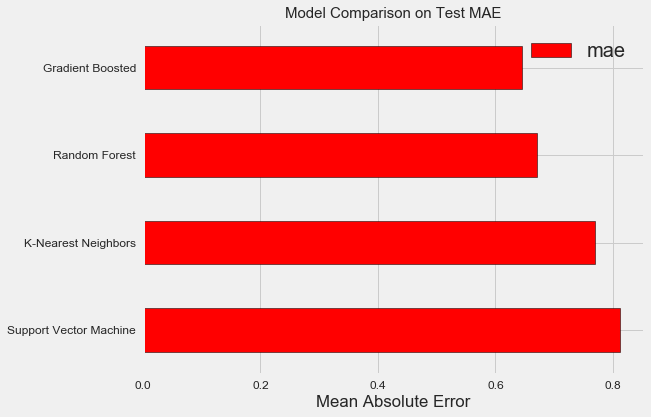

In [54]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Support Vector Machine','Random Forest', 'Gradient Boosted','K-Nearest Neighbors'],
                                 'mae': [svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh', color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel('')
plt.yticks(size = 12)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 12)
plt.title('Model Comparison on Test MAE', size = 15);

**Ran simple linear regression as well, but performed so badly I removed outcome from chart above because it drastically skewed bar chart. Code is still present if want to include in chart.**

GradientBoosting method performed the best, followed by Random Forest. Remember that **only the default parameters were used in this performance comparison** for all the models deployed. This creates limits on model performance, especially for the SVM, where its hyperparameters/tuning creates significant change to its outcome. Gradient Boosting and Random Forest methods are good to begin with because of this reason as well, less dependent on hyperparameters and tuning. It appears machine learning is an applicable solution for solving current task/problem here. All algorithms deployed (except SVM) outperformed the baseline model using only default parameters. 

Next I will optimize the best performing model (GradientBoosting) by way of hyperparameter tuning.

# Optimization
Applicable to machine learning, to optimize a model means finding the best suited hyperparameters for the model determined by the specific problem or task trying to be answered or solved.

## Hyperparameter Tuning
Parameters and Hyperparameters and differences. Below is a basic definition of both that I've come across multiples places and should suffice for general purposes:
- Parameter: "A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data."
- Hyperparameter: "A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data."

A good rule of thumb to overcome this, “If you have to specify a model parameter manually, then it is probably a model hyperparameter."

We tune hyperparameters to minimize effects of over-fitting and under-fitting. If the model is under-fitting, means the model has high-bias. This means generally that the model doesnt have the ablility to learn the relationships between the features and the target. To correct for this, you would want to make the model more complex.

A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set. With a model that over-fits has high variance and may simply just be memorizing the training data, you can correct this by minimizing complexity. Under-fitting and over-fitting both lead to poor performance of the model.

Choosing hyperparameters will be different for every problem. There are several methods for choosing the best hyperparameters for a model. Some of the most common ways to do so are using Random Seach with Cross-Validation.

## Random Search and Cross Validation for Hyperparameter Tuning
We can choose the best hyperparameters for a model with random search and cross validation.

- **Random search** refers to a technique where random combinations of the hyperparameters are used to find the best solution for the model. A draw-back to Random Search is that it yields high variance. This is because the process of selecting these parameter combinations is random.

- **Cross validation** assess the performance of these hyperparameters. Instead of splitting the train set into training and validation sets, which reduces the amount of training data we can use, we use **K-Fold Cross Validation**. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and from here, train the model on all the training data at once. The performance that is recorded from this process is then used to compare the different combinations of hyperparameters.

Below, I will use Random Search with Cross-Validation to select the most optimal hyperparameters for the gradient Boosting model I chose to move forward with. First define the grid then randomly sample hyperparameters for the grid. Next we evaluate with 4-Fold-Cross-Validation, then select the best-performing hyperparameters.

## Establish parameter distributions and build grid

In [55]:
# Loss function
loss = ['ls', 'lad', 'huber']

# Number of trees
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth (for decision tree)
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples for node split
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider when splitting node
max_features = ['auto', 'sqrt', 'log2', None]

# Define hyperparameter grid
grid = {'loss': loss,'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_leaf': min_samples_leaf,
        'min_samples_split': min_samples_split,'max_features': max_features}

I selected the above six parameters for tuning, for the GradientBoosting model. Ahead of time it is hard to know precisely how each one will affect the model at this point. To find the best combination, we need to test them.

**The Randomized Search Object is trained the same way as any other scikit-learn model. After training, we can compare all the different hyperparameter combinations and find the best performing one.**

## Call Grid into Randomized Search Object

In [56]:
# Model we chose for hyperparameter tuning
model = GradientBoostingRegressor(random_state=7)

# RandomizedSearch w/ 4-fold cross validation
RandomSearch_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=7)

In the code above, the the Randomized Search Object was created where i passed in the estimator (model), the hyperparameter grid (Grid) as well as the following parameters:

**cv**: number of folds for k-fold cross validation. **n_iter**: number of combinations. **scoring**: metric for evaluation. **n_jobs**: number of cores (jobs) to run in parallel (-1 will use all available). **verbose**: how much information to display (1 displays a limited amount). **return_train_score**: returns the train score for each CV fold. **random_state**: fixes the random number generator used for consistency of results.

In [57]:
# Fit on the training data
RandomSearch_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.3min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. Therefore, a better score will be closer to 0.

# Interpreting Random Search results
I will call the results of the Random Search process (above) into a dataframe sorted by performance for easier interpretation.

In [58]:
# Results sorted by test performance
randomCV_results = pd.DataFrame(RandomSearch_cv.cv_results_).sort_values('mean_test_score', ascending = False)

randomCV_results.head(10)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        2.444243         0.007756        -0.662533         -0.508694   
22       6.529174         0.015011        -0.662752         -0.486709   
10       7.130352         0.034527        -0.668033         -0.387642   
3        0.612184         0.002001        -0.671739         -0.551480   
15       2.089619         0.003002        -0.673440         -0.412603   
14      15.409141         0.016262        -0.679762         -0.361343   
24      11.613944         0.009506        -0.682987         -0.283237   
21      13.700818         0.021266        -0.683731         -0.273405   
2        1.945881         0.009005        -0.683847         -0.266164   
19       4.405768         0.006505        -0.684611         -0.440767   

   param_loss param_max_depth param_max_features param_min_samples_leaf  \
0       huber               2               log2                      6   
22        lad               2               log2                      8   
10        lad               3               sqrt                      8   
3         lad               3               sqrt                      4   
15      huber               5               log2                      1   
14        lad               3               None                      6   
24        lad               5               None                      1   
21        lad               5               auto                      6   
2          ls               3               sqrt                      2   
19         ls               2               None                      8   

   param_min_samples_split param_n_estimators  \
0                        6                500   
22                      10               1100   
10                       2               1100   
3                        6                100   
15                       2                100   
14                      10               1100   
24                      10                500   
21                       6                500   
2                       10                900   
19                       6                500   

                                               params  rank_test_score  \
0   {'n_estimators': 500, 'min_samples_split': 6, ...                1   
22  {'n_estimators': 1100, 'min_samples_split': 10...                2   
10  {'n_estimators': 1100, 'min_samples_split': 2,...                3   
3   {'n_estimators': 100, 'min_samples_split': 6, ...                4   
15  {'n_estimators': 100, 'min_samples_split': 2, ...                5   
14  {'n_estimators': 1100, 'min_samples_split': 10...                6   
24  {'n_estimators': 500, 'min_samples_split': 10,...                7   
21  {'n_estimators': 500, 'min_samples_split': 6, ...                8   
2   {'n_estimators': 900, 'min_samples_split': 10,...                9   
19  {'n_estimators': 500, 'min_samples_split': 6, ...               10   

    split0_test_score  split0_train_score  split1_test_score  \
0           -0.677887           -0.501177          -0.681412   
22          -0.678307           -0.483909          -0.680300   
10          -0.673204           -0.386070          -0.682974   
3           -0.696648           -0.546750          -0.679835   
15          -0.689706           -0.397737          -0.708719   
14          -0.696520           -0.356987          -0.703991   
24          -0.714905           -0.286052          -0.704518   
21          -0.716512           -0.266132          -0.694842   
2           -0.683157           -0.268265          -0.703198   
19          -0.693329           -0.436702          -0.691000   

    split1_train_score  split2_test_score  split2_train_score  \
0            -0.499997          -0.658046           -0.514752   
22           -0.482290          -0.654751           -0.488283   
10           -0.383783          -0.673690           -0.389608   
3            -0.543147          -0.647571           -0

In [59]:
RandomSearch_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=6, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

The best gradient boosted model for this project has the following hyperparameters:

 - loss = 'huber'
 - n_estimators = 100 
 - max_depth = 3
 - min_samples_leaf = 4 
 - min_samples_split = 10
 - max_features = 'sqrt'

In [60]:
RandomSearch_cv.best_params_

{'loss': 'huber',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 500}

Random Search helps to narrow down hyperparameters. Before this process, the idea of which combinations of hyperparameters are the best fit for the model and specific problem are hard to determine.

Next, I could use the results from the Random Search and plug them into a Grid Search. Instead of doing this for all of them, I willl do so for a single hyperparameter to determine its individual effect on model performance, apposed to feeding Grid Search with all of the results and losing this explicit information pertaining to a single hyperparameter. I will choose "n_estimators" for this process, which represents the number of trees in the forest, while keeping the other hyperparameters constant to what was returned from the random Search process. One could make the assumption that varying this hyperparameter will alter under and over-fitting of the model. I will define a distribution for the range of trees and then graph the train and test results for better interpretation.

In [61]:
# Create a grid representing distribution of trees 
grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 3,
                                  min_samples_leaf = 4,
                                  min_samples_split = 10,
                                  max_features = 'sqrt',
                                  random_state = 7)

# Grid Search Object
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=4, scoring='neg_mean_absolute_error', verbose=1, 
                           n_jobs=-1, return_train_score=True)

In [62]:
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

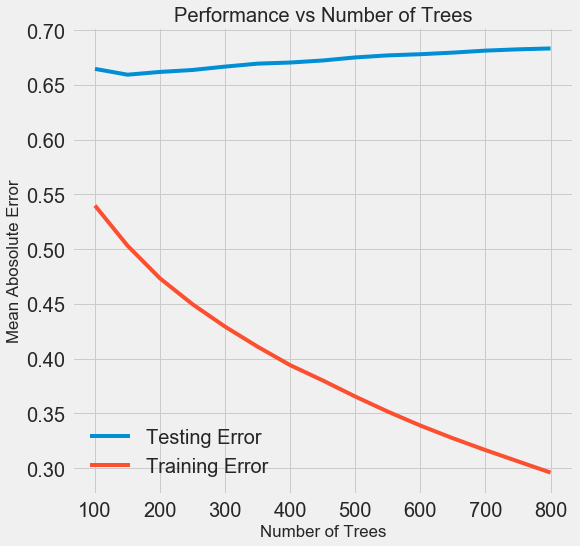

In [63]:
# Grid Search results into DF form
grid_search_results = pd.DataFrame(grid_search.cv_results_)

# Graph the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(grid_search_results['param_n_estimators'], -1 * grid_search_results['mean_test_score'], label = 'Testing Error')
plt.plot(grid_search_results['param_n_estimators'], -1 * grid_search_results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Abosolute Error')
plt.legend()
plt.title('Performance vs Number of Trees');

In [64]:
grid_search_results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
1       1.246634         0.002251        -0.659378         -0.503212   
2       1.263030         0.002252        -0.661912         -0.473306   
3       1.550485         0.003002        -0.663692         -0.449661   
0       1.333575         0.006505        -0.664692         -0.539875   
4       1.861081         0.003502        -0.666777         -0.429205   

  param_n_estimators                 params  rank_test_score  \
1                150  {'n_estimators': 150}                1   
2                200  {'n_estimators': 200}                2   
3                250  {'n_estimators': 250}                3   
0                100  {'n_estimators': 100}                4   
4                300  {'n_estimators': 300}                5   

   split0_test_score  split0_train_score  split1_test_score  \
1          -0.674129           -0.499023          -0.674578   
2          -0.674776           -0.470720          -0.677098   
3          -0.675882           -0.446925          -0.678697   
0          -0.683911           -0.534079          -0.677368   
4          -0.675495           -0.425867          -0.681534   

   split1_train_score  split2_test_score  split2_train_score  \
1           -0.498135          -0.654364           -0.502351   
2           -0.465637          -0.661000           -0.470076   
3           -0.440412          -0.665495           -0.449657   
0           -0.534166          -0.654247           -0.538516   
4           -0.423004          -0.670086           -0.426556   

   split3_test_score  split3_train_score  std_fit_time  std_score_time  \
1          -0.634367           -0.513341      0.172080        0.000433   
2          -0.634692           -0.486792      0.013586        0.000434   
3          -0.634605           -0.461648      0.027157        0.000707   
0          -0.643176           -0.552740      0.288029        0.001660   
4          -0.639913           -0.441392      0.023031        0.000500   

   std_test_score  std_train_score  
1        0.016570         0.006055  
2        0.016856         0.008028  
3        0.017474         0.007693  
0        0.016595         0.007641  
4        0.016008         0.007162

This shows our model is overfitting. The training error is lower than the testing error, which shows that the model is learning the training data  well but is unable to generalize to the test data.

As the number of trees increases, the amount of overfitting increases. The test error begins to increase gradually as the number of trees increase and the train error decreases rapidly.

**There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, we want to try and reduce overfitting,** either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization. To do so for [For the gradient boosting regressor](https://www.quora.com/How-do-you-correct-for-overfitting-for-a-Gradient-Boosted-Machine), some things that could be done to correct this would be reducing the number of trees, reducing the max depth of each tree, and increasing the minimum number of samples in a leaf node. For now, I will use model as is and accept that it may be overfitting to the training set.

Shown by the cross validation results, the best model using **150 trees (n_estimators) achieves a cross validation error (mean test score) under 0.67**. This means that the average cross-validation estimate of our target (neuroticism) is within **0.66** points of the true answer.

# Final Model Evaluation on Test data
We will use the best model from hyperparameter tuning to make predictions on the test set. This model has never seen the test set before, so this model's performance indicate how well the model would perform in real-world setting.

For comparison, we can compare alongside the performance of the default model. In the code below, I will create the final model, train it (with timing) and then evaluate on test data.

In [65]:
# Default model
default_model = GradientBoostingRegressor(random_state=7)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [66]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

1.8 s ± 228 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [67]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

2.28 s ± 128 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [68]:
default_prediction = default_model.predict(X_test)
final_prediction = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_prediction))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_prediction))

Default model performance on the test set: MAE = 0.6454.
Final model performance on the test set:   MAE = 0.6539.


The baseline model out-performs the final model by about 1.3%.

Machine learning often has many trade-off considerations: bias vs variance, acccuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation. Here, seeing that the default model did slightly better than the final model, one would go back and make necessary adjustments previously mentioned (reducing the number of trees, reducing the max depth of each tree, and increasing the minimum number of samples in a leaf node).

I will graph the distribution of true values and predicted values on the test set for visual interpretation.

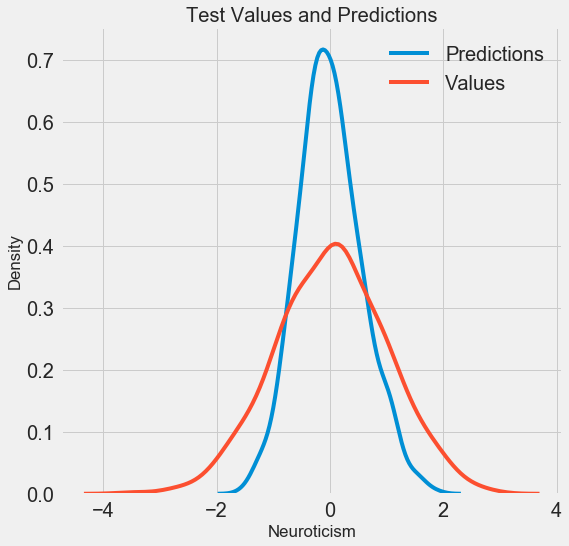

In [69]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_prediction, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Neuroticism')
plt.ylabel('Density')
plt.title('Test Values and Predictions');

Below I will also create a histogram plot of the residuals. The hope is that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

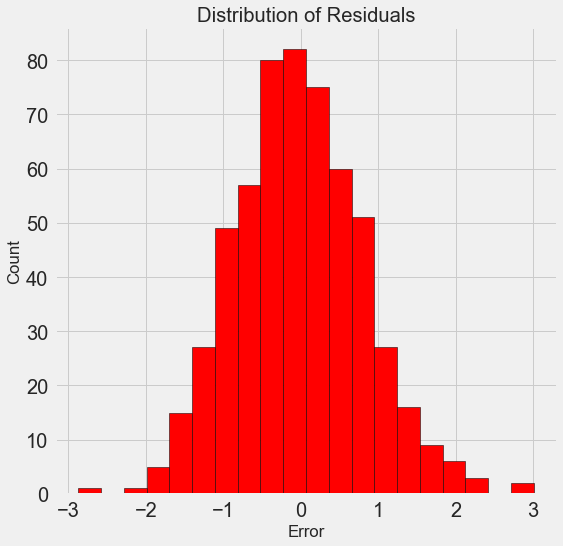

In [70]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_prediction - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are close to normally disributed, with a few noticeable outliers on the low and the high end. These indicate errors where the model estimate was way below and way above that of the true value.

# Conclusions

The results showed us that machine learning is applicable to our problem, BUT, considering the default model outperformed final model, along with the looks of the density distribution of predictions relative to the true values, the model needs some work and adjustments to be had. The work shown in this notebook, could be thought of as the first iteration of the ml model creation process as a wole, and surely would be revisited in all realistic scenerios.

It was determined though, that machine learning is applicable to this desired task/use-case. The final model able to the predict the Neuroticism value to within .6539 points. We also saw that hyperparamter tuning, at least initial attempts did not improve the performance of the model. Good time to remember that proper feature engineering and gathering more data (if possible) has a much larger pay-off than fine-tuning the model. Also observed was the trade-off in run-time versus accuracy, just another consideration to take into account when models.

At this point, the next step in the process would be determining how exaclty the model arrived at the decisions it made. To gather this information would be very helpful understanding the model as well as understanding the problem trying to be solved by the model as well. For example, what features does the model rely on to infer the Neuroticism score? It is possible to use this model for feature selection and implement a simpler model that is more interpretable?

## Additional libraries needed for exploring and interpreting model outcome

In [71]:
from sklearn import tree
import lime 
import lime.lime_tabular

# Model Interpretation

Using the Locally Interpretable Model-agnostic Explainer (LIME), we can attempt to understand and explain how the model arrived at its results. LIME attempts to explain moel predictions by learning a linear regression around the prediction. I will take a look at several ways of interpreting the model using **feature importances, examining a single decision tree** from the ensemble, as well as with **LIME**.

## Feature Importances
One way to interpret an ensemble of decision trees is by using feature importances. These essentially are the variables that are most predictive of the target. I will use the relative values to compare the features to determine which are most relevent.

Below I will extract the feature importances from a trained ensemble of trees and then store the feature importances in a dataframe for better interpretation and analysis.

In [72]:
# feature importances into dataframe
Feature_Results = pd.DataFrame({'Feature':list(X_train_features.columns),'Importance':final_model.feature_importances_})
# Show top-10 most relevent
Feature_Results = Feature_Results.sort_values('Importance', ascending = False).reset_index(drop=True)

Feature_Results.head(10)

Feature  Importance
0       Extraversion    0.158755
1  Conscientiousness    0.125984
2      Agreeableness    0.061302
3          Impulsive    0.055568
4                 ID    0.046888
5             Gender    0.034567
6                Age    0.029551
7          Education    0.024145
8         Benzos_CL0    0.017141
9           Openness    0.016078

It appears Extraversion and Conscientiousness are the most most important features by a relatively large margin. After these, the importance tapers off pretty steadily, implying the notion that we may not need to keep them all and perhaps exclude them while maintaining performance of model.

Below I will graph the feature importances visually with the bar chart.

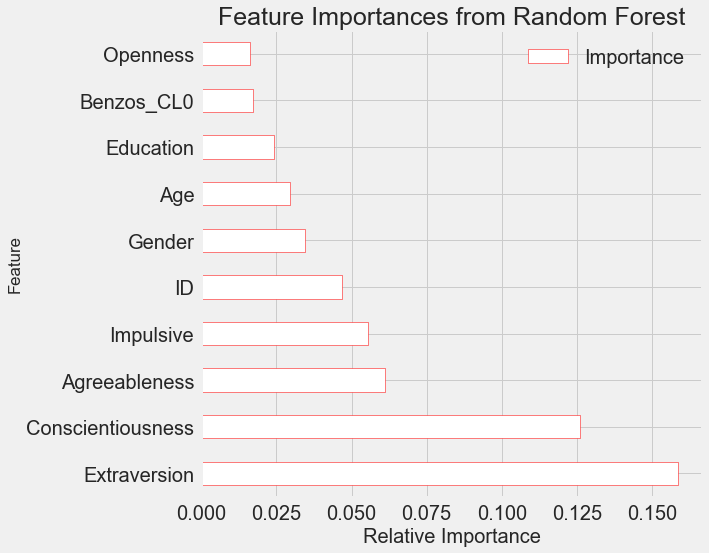

In [73]:
# top-10 features (importance)
plt.style.use('fivethirtyeight')

Feature_Results.loc[:9, :].plot(x= 'Feature', y= 'Importance', edgecolor= 'r', kind= 'barh', color= 'w')
plt.xlabel('Relative Importance', size = 20)
plt.title('Feature Importances from Random Forest', size = 25);

# Feature Importance for Feature Selection

In [74]:
# Extract most important features
best_features = Feature_Results['Feature'][:10]
# Locate index position for each feature
indices = [list(X_train_features.columns).index(x) for x in best_features]
# Keep only the most important features
X_train_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape:', X_train_reduced.shape)
print('Most important testing features shape:', X_test_reduced.shape)

Most important training features shape: (1319, 10)
Most important testing features shape: (566, 10)


In [75]:
lr = LinearRegression()

# train full feature set
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# train reduced feature set
lr.fit(X_train_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

print('Linear Regression results on full feature set: MAE = %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression results on reduced feature set: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression results on full feature set: MAE = 3428777.8024.
Linear Regression results on reduced feature set: MAE = 0.6316.


Reducing the number of features by **removing features of lowest importance drastically improved linear regression performance**.

Lets take a look at performance for Gradient Boosting using the reduced set of features (below).

In [82]:
# Create the model with the same hyperparamters
final_model_reduced = GradientBoostingRegressor(loss='huber', max_depth=3, max_features='sqrt',
                                  min_samples_leaf=4, min_samples_split=10, 
                                  n_estimators=150, random_state=7)

# Fit and test on the reduced set of features
final_model_reduced.fit(X_train_reduced, y)
final_model_reduced_pred = final_model_reduced.predict(X_test_reduced)

print('Final Model (Gradient Boosted) w/ reduced set results: MAE = %0.4f' % mae(y_test, final_model_reduced_pred))

Final Model (Gradient Boosted) w/ reduced set results: MAE = 0.6556


The final model with the reduced set of features are minimaly worse (**full set MAE: 0.6539 vs reduced set MAE: 0.6556**), therefore I will keep the full set of features. The point of checking this is the fact that throughout the model building process, the goal is to build the simplest model with adequate performance. Having less features, if reasonable, will keep computing costs low making for a faster more efficient and interpretable model generally. In this case, keeping all of the features wont be a big concern because training time isnt significant to begin with given the fact I'm working with a small dataset and should still be completely fine interpreting the model with all of the features.

# Locally Interpretable Model-agnostic Explanations (LIME)

Next, using LIME I will attempt to explain model predictions. I will use an example where the model is very wrong as well as an example that the model gets right. For easier intrepretation, I will use the reduced set that holds the top-ten features.

In [83]:
# Residuals
residuals = abs(final_model_reduced_pred - y_test)
    
# right and wrong prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [84]:
# Creat explainer object using LIME
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train_reduced, mode = 'regression',
                                                   training_labels = y, feature_names = list(best_features))

Prediction: -0.4773
Actual Value: 2.6114


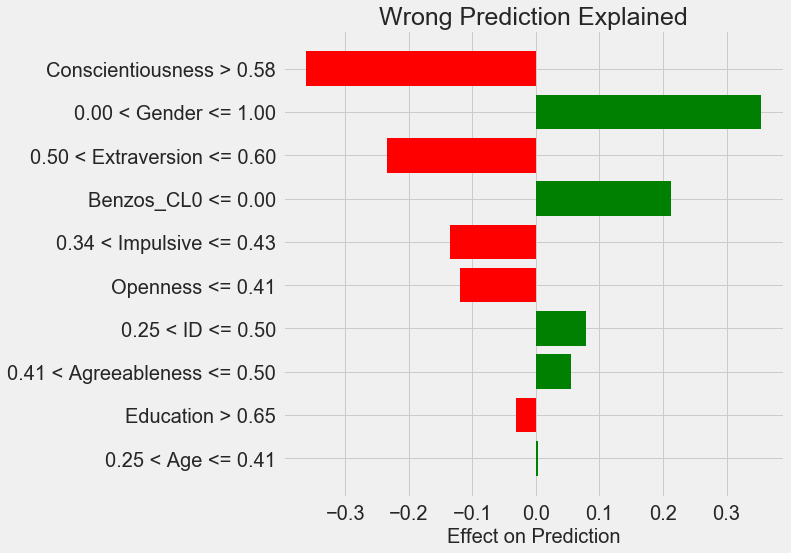

In [85]:
# True and predicted value for the wrong instance
print('Prediction: %0.4f' % final_model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Wrong prediction explained
wrong_explained = explainer.explain_instance(data_row = wrong, predict_fn = final_model_reduced.predict)

# Graph explanation for wrong prediction
wrong_explained.as_pyplot_figure()
plt.title('Wrong Prediction Explained', size = 25)
plt.xlabel('Effect on Prediction', size = 20);

In [86]:
wrong_explained.show_in_notebook(show_predicted_value=False)

Gradient boosted model predicted -0.4773 and the actual value was 2.6114.

Break-down graphs like these are helpful. Perhaps most helpful in the case when inspecting very innaccurate predictions. Stocked with this sort of insight into model decisions, one could possibly re-engineer better features or make tuning adjustments to hyperparameters to arrive at improved outcomes.

The graph for LIME makes easy to visualize the contribution of each feature for the final prediction. the break-down graph shows (above) conscientiousness was above 0.58 and because of this it greatly affected the predicted value most negatively, followed by extraversion which was next in line for its negative affect on the model prediction. On the other hand, gender increased the prediction because it was lower than or equal to 1.

We can interpret this as the model predicted a relatively average neuroticism score when it was actually a higher score because this individual's conscientiousness score was above 0.58 and had a extraversion score between 0.50 and 0.60. This very wrong prediction may have originally been confusing but after breaking down the model logic, things can be easier understood. 

May be worth exploring more deeply, the reasons for the mistakes and the correct predictions a model makes.This could lead to working with an algorithm to better understand the problem. LIME is useful for these reasons and has also rid some of the "black-box" skepticism around machine learning models. Luddites and practitioners alike may agree, though LIME is relatively new and isnt perfect, its better than what we previously had the ability to do, blindly trust every prediction a model makes.

Below I will implement the same process again, for a prediction the model was correct on.

Prediction: -0.4631
Actual Value: -0.4672


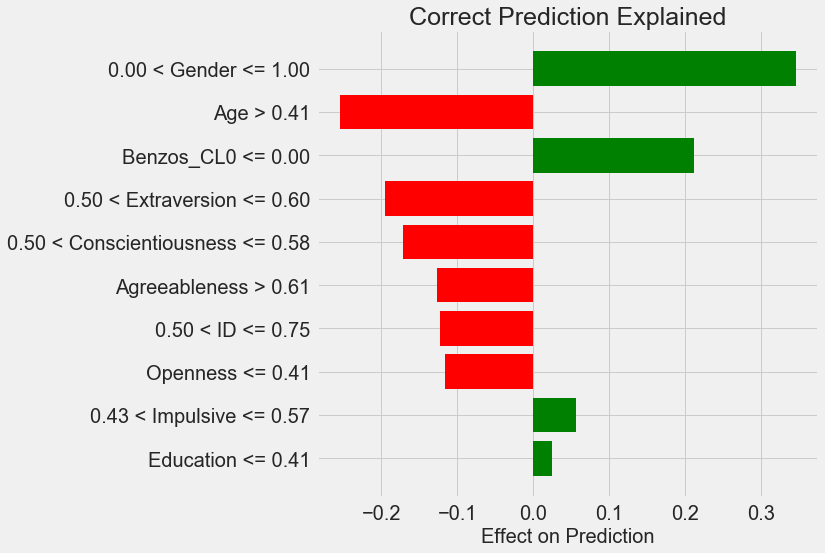

In [87]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % final_model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_explained = explainer.explain_instance(right, final_model_reduced.predict, num_features=10)

# Graph explanation for correct prediction
right_explained.as_pyplot_figure()
plt.title('Correct Prediction Explained', size = 25)
plt.xlabel('Effect on Prediction', size = 20);

In [88]:
right_explained.show_in_notebook(show_predicted_value=False)

Here the model predicted -0.4631, very close to the actual value of -0.4672. The most significant features that contributed to this correct model prediction were gender, followed by this Benzos Class 0 (CL0 = Never Used), whereas the age (late 30's, early forties) of this individual had the greatest negative impact.

# Examining a Single Decision Tree

Because the gradient boosting method is a tree based learner, I will take a look at a individual estimator (decision-tree). This final model is made-up of 150 decision trees and looking into the logic flow and order of a single tree isnt necessarily a good representation of performance for the model as a whole, its a fantastic visual and gives a great picture of how the decision process of a tree based learner works.

In [90]:
# Extract a single tree
decision_tree = final_model_reduced.estimators_[105][0]

tree.export_graphviz(decision_tree, out_file = 'C:/Users/Emtma_000/Desktop/Data Science/decision tree.dot',
                     rounded = True, feature_names = best_features, filled = True)

decision_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x000000BF5F665630>,
           splitter='best')

I couldnt remember how i had in the past was able to convert dot to png, then open in jupyter notebook this time unfortunately, most likely i will get it to work as soon as i send this over.

I realize in a real-world setting one would probably predict for a different outcome, something more useful given the available data like how each trait contributed to potential use of each sort of drug. At the time when I began this project (less clear on things), its what I had decided to do and going back to correct the major errors in this project i didnt want to rebuild everything. With that said please provide feedback, critiques, comments.